In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import numpy as np
from torch.utils.data import Dataset
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt


In [2]:
batch_size = 256
learning_rate = 0.01
epoches = 50



In [3]:
class Data(Dataset):
    def __init__(self, csv_file, transform=None):

        super(Data, self).__init__()
        file = pd.read_csv(csv_file)
        self.input_data = file[['x']].values
        self.labels = file['y'].values.astype(int)   
          
    def __getitem__(self, index):
        data_item = self.input_data[index]
        data_item = torch.tensor(data_item).float()

        label = self.labels[index]
        return data_item, label

    def __len__(self):
        return len(self.input_data)

In [4]:
train_data = Data('train_q3.csv')
test_data = Data('test_q3.csv')
train_dataloader = DataLoader(train_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
           nn.Linear(1,4),
           nn.ReLU(),
           nn.Sigmoid(),
        )
        self.initialize_weights()

        
    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits
    
    def initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_uniform_(m.weight)
                if m.bias is not None:
                     nn.init.zeros_(m.bias)  

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = NeuralNetwork().to(device)

In [7]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

  2%|▏         | 1/50 [00:00<00:15,  3.20it/s]

 Train accuracy: 54.7%, Avg loss: 1.340353


  4%|▍         | 2/50 [00:00<00:12,  3.82it/s]

 Train accuracy: 63.4%, Avg loss: 1.333190
 Train accuracy: 72.1%, Avg loss: 1.326437


  8%|▊         | 4/50 [00:00<00:10,  4.34it/s]

 Train accuracy: 81.0%, Avg loss: 1.320077
 Train accuracy: 90.1%, Avg loss: 1.314076


 12%|█▏        | 6/50 [00:01<00:10,  4.02it/s]

 Train accuracy: 98.1%, Avg loss: 1.308418


 14%|█▍        | 7/50 [00:01<00:10,  4.14it/s]

 Train accuracy: 99.7%, Avg loss: 1.303068


 16%|█▌        | 8/50 [00:01<00:09,  4.20it/s]

 Train accuracy: 99.6%, Avg loss: 1.297999


 18%|█▊        | 9/50 [00:02<00:10,  3.94it/s]

 Train accuracy: 99.6%, Avg loss: 1.293199


 20%|██        | 10/50 [00:02<00:10,  3.64it/s]

 Train accuracy: 99.6%, Avg loss: 1.288656


 22%|██▏       | 11/50 [00:02<00:11,  3.50it/s]

 Train accuracy: 99.6%, Avg loss: 1.284362


 24%|██▍       | 12/50 [00:03<00:10,  3.76it/s]

 Train accuracy: 99.5%, Avg loss: 1.280300
 Train accuracy: 99.5%, Avg loss: 1.276446


 28%|██▊       | 14/50 [00:03<00:09,  3.79it/s]

 Train accuracy: 99.5%, Avg loss: 1.272794


 30%|███       | 15/50 [00:03<00:09,  3.76it/s]

 Train accuracy: 99.5%, Avg loss: 1.269322


 32%|███▏      | 16/50 [00:04<00:09,  3.70it/s]

 Train accuracy: 99.5%, Avg loss: 1.266016


 34%|███▍      | 17/50 [00:04<00:08,  3.71it/s]

 Train accuracy: 99.5%, Avg loss: 1.262867


 36%|███▌      | 18/50 [00:04<00:08,  3.74it/s]

 Train accuracy: 99.4%, Avg loss: 1.259869
 Train accuracy: 99.4%, Avg loss: 1.257009


 40%|████      | 20/50 [00:05<00:07,  4.26it/s]

 Train accuracy: 99.4%, Avg loss: 1.254279
 Train accuracy: 99.4%, Avg loss: 1.251668


 44%|████▍     | 22/50 [00:05<00:06,  4.54it/s]

 Train accuracy: 99.4%, Avg loss: 1.249171


 46%|████▌     | 23/50 [00:05<00:05,  4.50it/s]

 Train accuracy: 99.4%, Avg loss: 1.246782


 48%|████▊     | 24/50 [00:06<00:06,  3.96it/s]

 Train accuracy: 99.4%, Avg loss: 1.244496
 Train accuracy: 99.4%, Avg loss: 1.242306


 52%|█████▏    | 26/50 [00:06<00:05,  4.35it/s]

 Train accuracy: 99.4%, Avg loss: 1.240206


 54%|█████▍    | 27/50 [00:06<00:05,  4.44it/s]

 Train accuracy: 99.4%, Avg loss: 1.238191


 56%|█████▌    | 28/50 [00:06<00:05,  4.16it/s]

 Train accuracy: 99.4%, Avg loss: 1.236254


 58%|█████▊    | 29/50 [00:07<00:04,  4.27it/s]

 Train accuracy: 99.4%, Avg loss: 1.234388
 Train accuracy: 99.4%, Avg loss: 1.232591


 62%|██████▏   | 31/50 [00:07<00:04,  4.52it/s]

 Train accuracy: 99.4%, Avg loss: 1.230861
 Train accuracy: 99.4%, Avg loss: 1.229193


 68%|██████▊   | 34/50 [00:08<00:03,  4.98it/s]

 Train accuracy: 99.4%, Avg loss: 1.227584
 Train accuracy: 99.4%, Avg loss: 1.226030


 70%|███████   | 35/50 [00:08<00:03,  4.92it/s]

 Train accuracy: 99.4%, Avg loss: 1.224523
 Train accuracy: 99.3%, Avg loss: 1.223063


 74%|███████▍  | 37/50 [00:08<00:02,  5.00it/s]

 Train accuracy: 99.3%, Avg loss: 1.221647
 Train accuracy: 99.3%, Avg loss: 1.220273


 78%|███████▊  | 39/50 [00:09<00:02,  5.17it/s]

 Train accuracy: 99.3%, Avg loss: 1.218941
 Train accuracy: 99.2%, Avg loss: 1.217646


 84%|████████▍ | 42/50 [00:09<00:01,  4.84it/s]

 Train accuracy: 99.2%, Avg loss: 1.216385
 Train accuracy: 99.2%, Avg loss: 1.215156


 86%|████████▌ | 43/50 [00:10<00:01,  4.68it/s]

 Train accuracy: 99.1%, Avg loss: 1.213958
 Train accuracy: 99.1%, Avg loss: 1.212790


 90%|█████████ | 45/50 [00:10<00:01,  4.69it/s]

 Train accuracy: 99.1%, Avg loss: 1.211650
 Train accuracy: 99.0%, Avg loss: 1.210538


 94%|█████████▍| 47/50 [00:10<00:00,  4.90it/s]

 Train accuracy: 99.0%, Avg loss: 1.209453


 96%|█████████▌| 48/50 [00:11<00:00,  4.75it/s]

 Train accuracy: 99.0%, Avg loss: 1.208394


 98%|█████████▊| 49/50 [00:11<00:00,  4.69it/s]

 Train accuracy: 99.0%, Avg loss: 1.207363


100%|██████████| 50/50 [00:11<00:00,  4.35it/s]

 Train accuracy: 99.0%, Avg loss: 1.206356


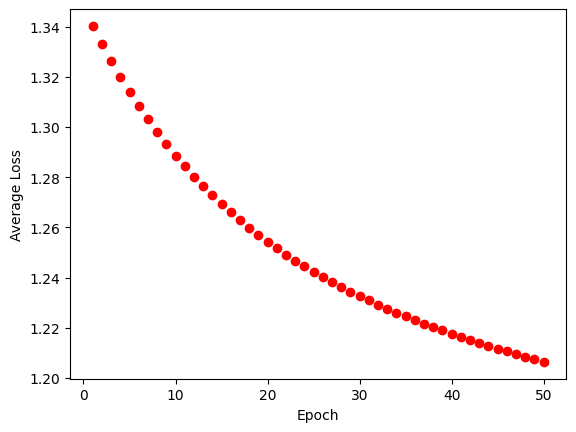

In [8]:
model.train()
epoches_time=0
for epoch in tqdm(range(epoches)):
    epoches_time=epoches_time+1
    train_loss, correct = 0, 0
    for X, y in train_dataloader:
        X, y = X.to(device), y.to(device)

        pred = model(X)

        loss = loss_fn(pred, y.long())

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # record loss
        train_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    size = len(train_dataloader.dataset)
    train_loss /= len(train_dataloader)
    correct /= size
    print(f" Train accuracy: {(100*correct):>0.1f}%, Avg loss: {train_loss:>8f}")
    plt.plot(epoches_time,train_loss,"ro")
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.show()

In [9]:
model.eval()
correct = 0
# Turn off gradient descent
with torch.no_grad():
    for X, y in tqdm(test_dataloader):
        X, y = X.to(device), y.to(device)
        pred = model(X)
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
size = len(test_dataloader.dataset)
correct = correct / size
print(f" Test accuracy: {(100*correct):>0.1f}%")

100%|██████████| 8/8 [00:00<00:00, 159.98it/s]

 Test accuracy: 98.8%


In [15]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[-1.7558],
        [ 1.6814],
        [ 0.2296],
        [-1.7671]], requires_grad=True)
Parameter containing:
tensor([ 0.9549,  0.9903, -0.1146, -0.4299], requires_grad=True)
